# GAN Performance

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -r /content/drive/MyDrive/Google_Colab/requirements.txt

In [ ]:
%cd /content/drive/MyDrive/Google_Colab

/content/drive/MyDrive/Google_Colab


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import qutip as qt
import qsttoolkit as qst
import tensorflow as tf
import logging
import time

## Data Preparation

In [ ]:
Nc = 32
Nd = 20
xgrid = np.linspace(-5, 5, Nd)
pgrid = np.linspace(-5, 5, Nd)

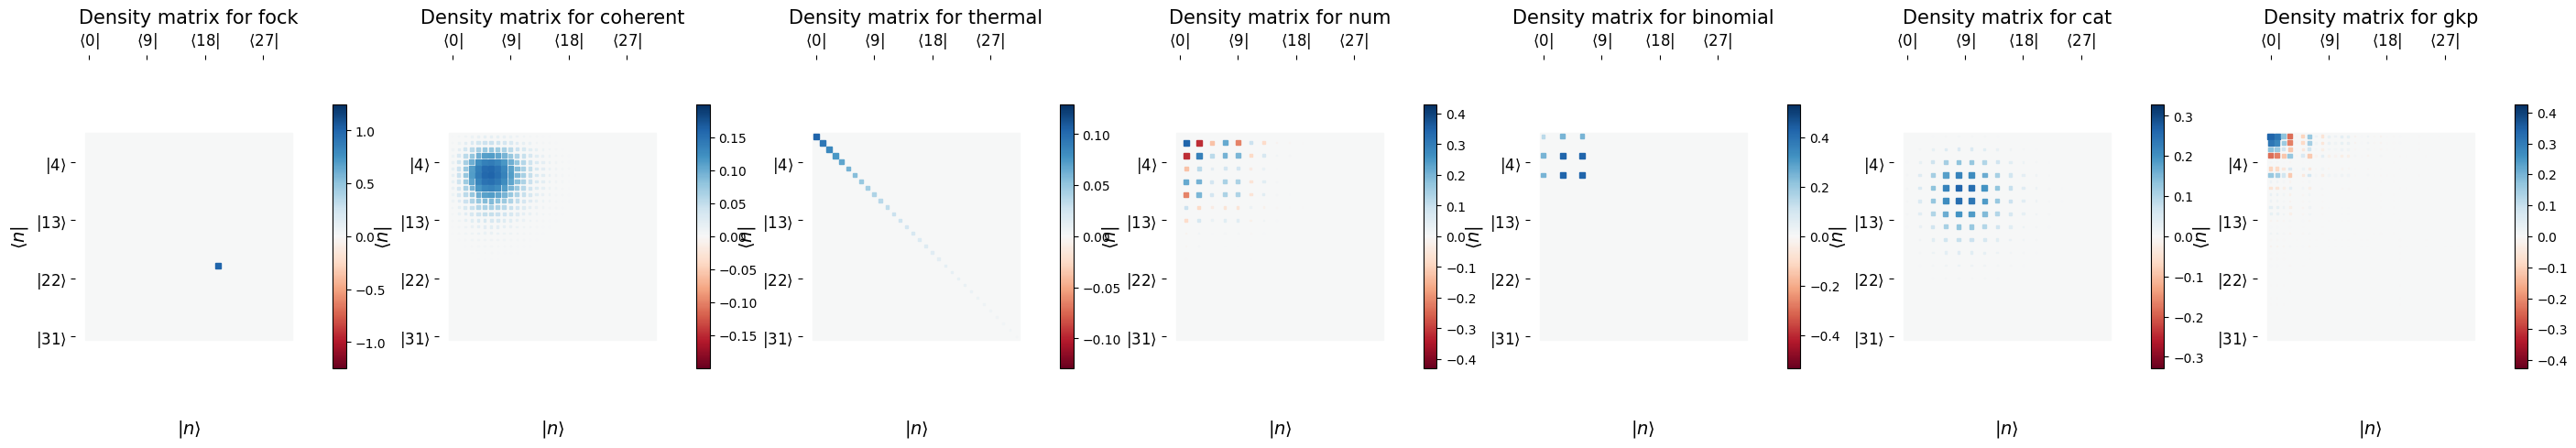

In [ ]:
fock_test = qt.fock_dm(Nc, 20)
coherent_test = qt.coherent_dm(Nc, 2.5)
thermal_test = qt.thermal_dm(Nc, 9)
num_test = qst.data.num_dm('M2', Nc)
binomial_test = qst.data.binomial_dm(Nc, 2, 2, 1)
cat_test = qst.data.cat_dm(Nc, 3)
gkp_test = qst.data.gkp_dm(Nc, [-5, 5], [-5, 5], 0.5, 4.5)

fig, ax = plt.subplots(1, 7, figsize=(35, 5))
qst.plot_Hinton(fock_test, ax=ax[0], label='fock')
qst.plot_Hinton(coherent_test, ax=ax[1], label='coherent')
qst.plot_Hinton(thermal_test, ax=ax[2], label='thermal')
qst.plot_Hinton(num_test, ax=ax[3], label='num')
qst.plot_Hinton(binomial_test, ax=ax[4], label='binomial')
qst.plot_Hinton(cat_test, ax=ax[5], label='cat')
qst.plot_Hinton(gkp_test, ax=ax[6], label='gkp')
plt.show()

## Average Fidelity

In [ ]:
measurement_operators = qst.tomography.measurement_operators(Nc, 'Husimi_Q', xgrid=xgrid, pgrid=pgrid)

In [ ]:
test_state = qst.mixed_state_noise(num_test, 0.2).full()
measurement_data = qst.expectation(test_state, measurement_operators).numpy().reshape(1, Nd**2)

GAN1 = qst.GANQuantumStateTomography(Nd**2)
GAN2 = qst.GANQuantumStateTomography(Nd**2)
GAN3 = qst.GANQuantumStateTomography(Nd**2)
GAN4 = qst.GANQuantumStateTomography(Nd**2)
GAN5 = qst.GANQuantumStateTomography(Nd**2)
models = [GAN1, GAN2, GAN3, GAN4, GAN5]

In [ ]:
epochs = 1000
# splits = 100
# step = int(epochs/splits)
runs = len(models)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['data_vector_input']
Received: inputs=Tensor(shape=(1, 400))
  warnings.warn(msg)


Epoch 0/1000, Generator Loss: 0.6694881916046143, Discriminator Loss: 0.6930185556411743, Fidelity: 0.2128771665661088
Epoch 20/1000, Generator Loss: 0.6388654112815857, Discriminator Loss: 0.692176342010498, Fidelity: 0.26399863218403957
Epoch 40/1000, Generator Loss: 0.6348500847816467, Discriminator Loss: 0.6915016174316406, Fidelity: 0.19408022554998303
Epoch 60/1000, Generator Loss: 0.645328164100647, Discriminator Loss: 0.6862137317657471, Fidelity: 0.15453538474454742
Epoch 80/1000, Generator Loss: 0.6493269205093384, Discriminator Loss: 0.6894769668579102, Fidelity: 0.20258444829149974
Epoch 100/1000, Generator Loss: 0.685198187828064, Discriminator Loss: 0.6801353693008423, Fidelity: 0.21417669437026934
Epoch 120/1000, Generator Loss: 0.6735436916351318, Discriminator Loss: 0.6848262548446655, Fidelity: 0.21757729244349827
Epoch 140/1000, Generator Loss: 0.6727166771888733, Discriminator Loss: 0.6778261661529541, Fidelity: 0.2680523029576223
Epoch 160/1000, Generator Loss: 0.6

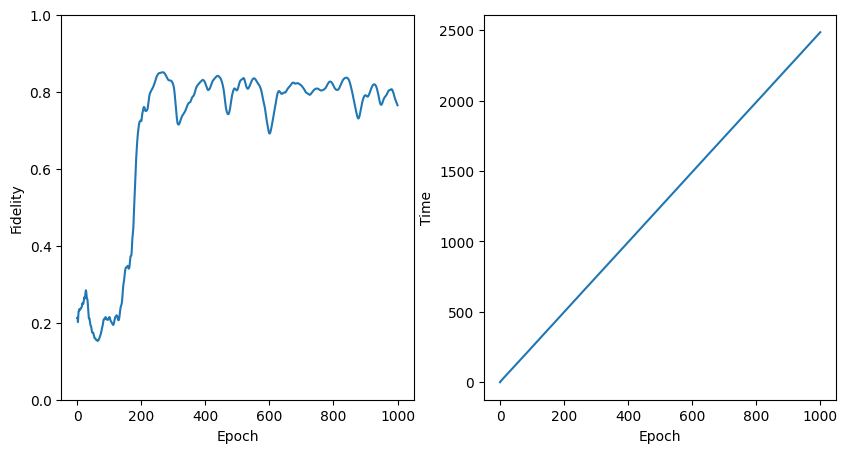

Run 1 time: 41.444605096181235 minutes, estimated time to completion: 2.7629736799663966 hours


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['data_vector_input']
Received: inputs=Tensor(shape=(1, 400))
  warnings.warn(msg)


Epoch 0/1000, Generator Loss: 0.6682314872741699, Discriminator Loss: 0.7074663639068604, Fidelity: 0.1687792745993402
Epoch 20/1000, Generator Loss: 0.6520259380340576, Discriminator Loss: 0.669100284576416, Fidelity: 0.21081914837367932
Epoch 40/1000, Generator Loss: 0.5820914506912231, Discriminator Loss: 0.6940421462059021, Fidelity: 0.25663521694303043
Epoch 60/1000, Generator Loss: 0.6041045188903809, Discriminator Loss: 0.687951385974884, Fidelity: 0.2783102097253732
Epoch 80/1000, Generator Loss: 0.6294040679931641, Discriminator Loss: 0.6837654113769531, Fidelity: 0.2529793900266859
Epoch 100/1000, Generator Loss: 0.6465833187103271, Discriminator Loss: 0.6784945726394653, Fidelity: 0.31705459242781686
Epoch 120/1000, Generator Loss: 0.6673195362091064, Discriminator Loss: 0.6869305372238159, Fidelity: 0.3559974524744702
Epoch 140/1000, Generator Loss: 0.661320686340332, Discriminator Loss: 0.6791501045227051, Fidelity: 0.4775165353711204
Epoch 160/1000, Generator Loss: 0.6207

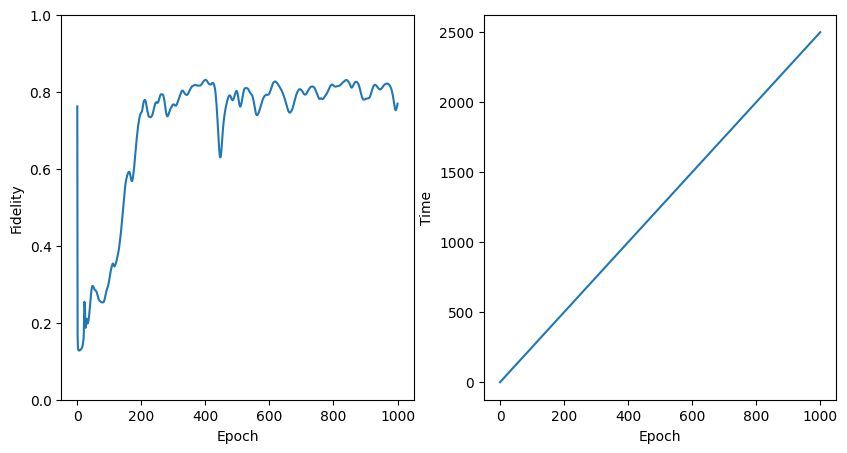

Run 2 time: 41.62075595060984 minutes, estimated time to completion: 2.081037802497546 hours


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['data_vector_input']
Received: inputs=Tensor(shape=(1, 400))
  warnings.warn(msg)


Epoch 0/1000, Generator Loss: 0.7057727575302124, Discriminator Loss: 0.6815071105957031, Fidelity: 0.2524219201710187
Epoch 20/1000, Generator Loss: 0.7201340198516846, Discriminator Loss: 0.6430431008338928, Fidelity: 0.10636645961310352
Epoch 40/1000, Generator Loss: 0.7461849451065063, Discriminator Loss: 0.597226083278656, Fidelity: 0.18540642068314486
Epoch 60/1000, Generator Loss: 0.660219669342041, Discriminator Loss: 0.6103742122650146, Fidelity: 0.18735642653506793
Epoch 80/1000, Generator Loss: 0.5155127048492432, Discriminator Loss: 0.7082222104072571, Fidelity: 0.45984350010231057
Epoch 100/1000, Generator Loss: 0.6046062707901001, Discriminator Loss: 0.6774832010269165, Fidelity: 0.5071901726324026
Epoch 120/1000, Generator Loss: 0.6411375403404236, Discriminator Loss: 0.6738157272338867, Fidelity: 0.5889943137685206
Epoch 140/1000, Generator Loss: 0.640487015247345, Discriminator Loss: 0.6938210129737854, Fidelity: 0.609777218604319
Epoch 160/1000, Generator Loss: 0.6723

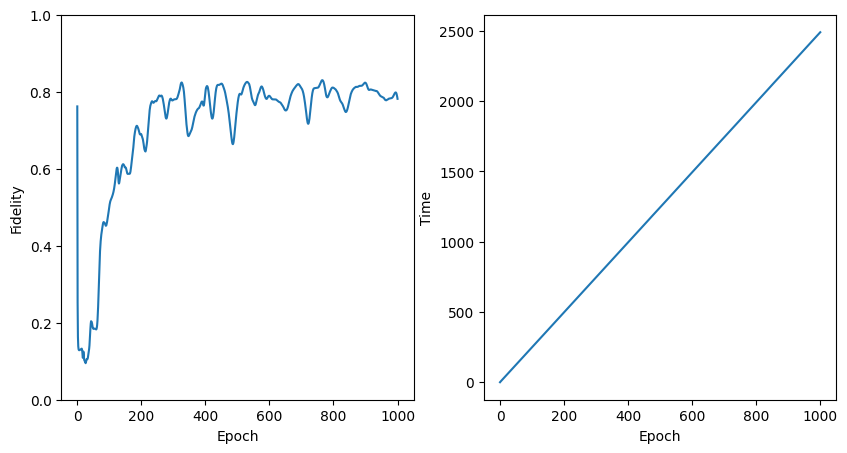

Run 3 time: 41.51949034929275 minutes, estimated time to completion: 1.383983014954461 hours


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['data_vector_input']
Received: inputs=Tensor(shape=(1, 400))
  warnings.warn(msg)


Epoch 0/1000, Generator Loss: 0.7143348455429077, Discriminator Loss: 0.684004008769989, Fidelity: 0.20940198730509343
Epoch 20/1000, Generator Loss: 0.6695029735565186, Discriminator Loss: 0.6679890751838684, Fidelity: 0.22937165964040257
Epoch 40/1000, Generator Loss: 0.5978958606719971, Discriminator Loss: 0.6867801547050476, Fidelity: 0.3814964088763915
Epoch 60/1000, Generator Loss: 0.6093384027481079, Discriminator Loss: 0.6893278360366821, Fidelity: 0.4553246509408736
Epoch 80/1000, Generator Loss: 0.6449055075645447, Discriminator Loss: 0.692031741142273, Fidelity: 0.5929719103811177
Epoch 100/1000, Generator Loss: 0.6696314215660095, Discriminator Loss: 0.6948879361152649, Fidelity: 0.6947800254808332
Epoch 120/1000, Generator Loss: 0.680363118648529, Discriminator Loss: 0.698499321937561, Fidelity: 0.7480366230935434
Epoch 140/1000, Generator Loss: 0.6741523146629333, Discriminator Loss: 0.6990442276000977, Fidelity: 0.7868258631682696
Epoch 160/1000, Generator Loss: 0.677923

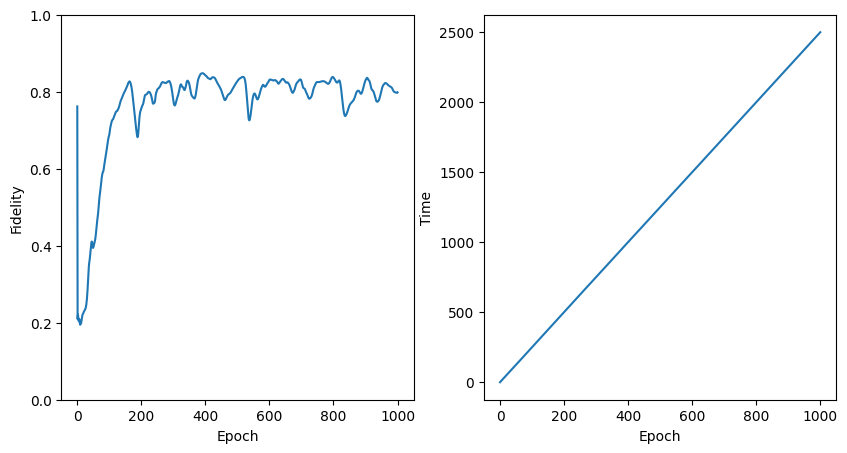

Run 4 time: 41.65940000613531 minutes, estimated time to completion: 0.6943233351575003 hours


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['data_vector_input']
Received: inputs=Tensor(shape=(1, 400))
  warnings.warn(msg)


Epoch 0/1000, Generator Loss: 0.6729915142059326, Discriminator Loss: 0.695417046546936, Fidelity: 0.24232086436738734
Epoch 20/1000, Generator Loss: 0.6446757912635803, Discriminator Loss: 0.6921087503433228, Fidelity: 0.26668350590817236
Epoch 40/1000, Generator Loss: 0.6546173095703125, Discriminator Loss: 0.6917694211006165, Fidelity: 0.2090011881023374
Epoch 60/1000, Generator Loss: 0.6657252311706543, Discriminator Loss: 0.6862823963165283, Fidelity: 0.2124411767972358
Epoch 80/1000, Generator Loss: 0.6874975562095642, Discriminator Loss: 0.6798850297927856, Fidelity: 0.3033520833871073
Epoch 100/1000, Generator Loss: 0.6637862920761108, Discriminator Loss: 0.6884668469429016, Fidelity: 0.3538022148917187
Epoch 120/1000, Generator Loss: 0.6732409596443176, Discriminator Loss: 0.6869494915008545, Fidelity: 0.6530879223672716
Epoch 140/1000, Generator Loss: 0.6727962493896484, Discriminator Loss: 0.6911650896072388, Fidelity: 0.7016645849983438
Epoch 160/1000, Generator Loss: 0.677

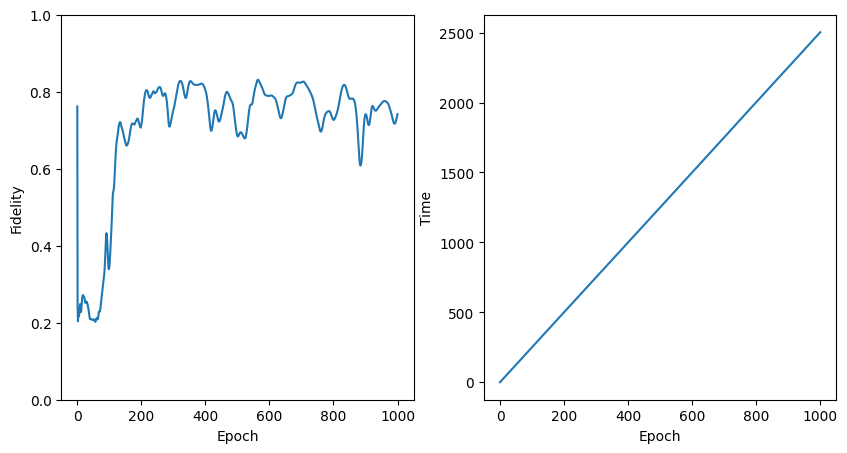

Run 5 time: 41.72338171402613 minutes, estimated time to completion: 0.0 hours


In [ ]:
tf.get_logger().setLevel(logging.ERROR)

results = pd.DataFrame({'epochs': range(0, epochs+1)})

for run in range(runs):
    loop_start_time = time.time()
    tf.keras.backend.clear_session()

    fidelities = []
    times = []

    model = models[run]
    zero_guess_dm = qst.reconstruct_density_matrix(GAN1.generator(measurement_data))[0].numpy()
    zero_fidelity = qst.fidelity(test_state, zero_guess_dm)
    fidelities.append(zero_fidelity)
    times.append(0.0)

    gen_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00015)
    disc_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00015)
    model.reconstruct(measurement_data,
                      measurement_operators,
                      epochs=epochs,
                      gen_optimizer=gen_optimizer,
                      disc_optimizer=disc_optimizer,
                      verbose_interval=20,
                      num_progress_saves=None,
                      true_dm=test_state,
                      time_log_interval=1)

    # for save in model.progress_saves:
    #     fidelities.append(qst.fidelity(test_state, save))
    fidelities.extend(model.fidelities)
    times.extend(model.times)

    results[f"num_fidelities_{run}"] = fidelities
    results[f"num_times_{run}"] = times

    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(results['epochs'], fidelities)
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Fidelity')
    axs[0].set_ylim(0, 1)

    axs[1].plot(results['epochs'], times)
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Time')
    plt.show()
    results.to_csv('GAN_num_fidelities.csv')
    print(f"Run {run+1} time: {(time.time() - loop_start_time)/60} minutes, estimated time to completion: {(time.time() - loop_start_time) * (runs - run - 1) / 3600} hours")

In [ ]:
results.to_csv('GAN_num_fidelities.csv')